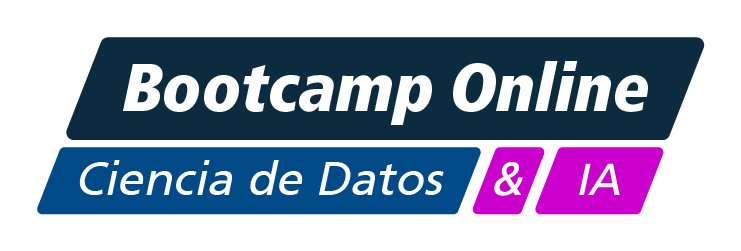

### Bases de Datos Relacionales (SQL)
#### Profesor: Diego Miranda Olavarria
#### Data Scientist

In [ ]:
# !pip install ipython-sql
# !pip install sqlite3
# !pip install sqlalchemy
# !pip install prettytable==3.5.0

In [1]:
import sqlite3
%load_ext sql

## Creacion de una base de datos

Para ejecutar comandos SQL en este entorno, antepondremos siempre `%sql` en las celdas a ejecutar. 

Lo primero que haremos sera crear nuestra base de datos: 

In [2]:
%sql sqlite:///database.db

Esto lo necesitamos ya que sqlite por defecto no revisa las condiciones de Foreign Keys

In [3]:
%sql PRAGMA foreign_keys = ON;

 * sqlite:///database.db
Done.


[]

Ya tenemos creada nuestra base de datos, asi que ahora debemos insertar las tablas que estipulamos en el esquema. Para crear tablas usamos el siguiente comando:

```
%sql CREATE TABLE <Nombre Tabla> (<atributo_1> tipo_1, ... , <attributo_N> tipo_N)
```

donde:


*   `<Nombre Tabla>` corresponde al nombre de la tabla
*  `<atributo_i>`, `tipo_i` corresponde al nombre del atributo 1 y a su tipo

Para identificar la PRIMARY KEY simplemente escribimos `PRIMARY KEY` despues del tipo del atributo correspondiente. Por ejemplo, si el `<atributo_1>` es la PRIMARY KEY, entonces el comando queda 
```
%sql CREATE TABLE <Nombre Tabla> (<atributo_1> tipo_1 PRIMARY KEY, ... , <attributo_N> tipo_N)
```

Alternativamente, podemos especificar la primary key despues de declarar todos los atributos. Supongamos que `<atributo_1>` y `<atributo_2>` son PRIMARY KEY de la tabla, entonces el comando queda: 
```
%sql CREATE TABLE <Nombre Tabla> (<atributo_1> tipo_1, <atributo_2> tipo_2 , ... <attributo_N> tipo_N, PRIMARY KEY(<atributo_1>, <atributo_2>))
```

Ahora creemos las tablas en nuestra base de datos: 

In [4]:
%sql CREATE TABLE Productos (id_producto int PRIMARY KEY, nombre char(20), reseña char(100))

 * sqlite:///database.db
Done.


[]

In [5]:
%%sql
SELECT *
FROM Productos;

 * sqlite:///database.db
Done.


id_producto,nombre,reseña


### Eliminar tablas

Para eliminar tablas usamos el siguiente comando



```
%%sql
DROP TABLE <Tabla>;
```



Por ejemplo si queremos eliminar la tabla Productos, hacemos: 

In [6]:
%%sql 
DROP TABLE Productos;

 * sqlite:///database.db
Done.


[]

Volvemos a crear la tabla, ya que la vamos a ocupar.

In [7]:
%sql CREATE TABLE Productos (id_prod int PRIMARY KEY, nombre char(20), reseña char(100))

 * sqlite:///database.db
Done.


[]

In [8]:
%%sql
SELECT * 
FROM Productos;

 * sqlite:///database.db
Done.


id_prod,nombre,reseña


### Modificar tablas

Para modificar tablas ya creadas usamos el comando ALTER TABLE.

Por ejemplo para incorporar una nueva columna a la tabla hacemos: 


```
%%sql
ALTER TABLE table_name
ADD column_name datatype;
```
Por ejemplo, si queremos añadir el año de cosecha a nuestra tabla Productos, hacemos: 


In [9]:
%%sql
ALTER TABLE Productos
ADD Stock int;

 * sqlite:///database.db
Done.


[]

In [10]:
%%sql
SELECT *
FROM Productos;

 * sqlite:///database.db
Done.


id_prod,nombre,reseña,Stock


## Insertar, eliminar y modificar tuplas

Bien, tenemos nuestra base de datos y nuestra tablas creada, pero aún no tienen datos!! 

Para este ejemplo, agregaremos de manera manual tuplas en cada una de las tablas y también mostraremos como eliminar o modificar tuplas ya ingresadas. 

### Inserción

Para insertar una tupla a una tabla utilizamos el siguiente comando: 


```
%%sql
INSERT INTO <Nombre Tabla> 
VALUES (<valor atributo 1> , ..., <valor atributo N>)
```
En este caso usamos `%%sql` antes de escribir el comando SQL, esto nos permite escribir varias lineas de codigo en formato SQL. 



In [11]:
%%sql
INSERT INTO Productos VALUES(1, "Nombre1", "Producto1", 2);

 * sqlite:///database.db
1 rows affected.


[]

In [12]:
%%sql
SELECT *
FROM Productos;

 * sqlite:///database.db
Done.


id_prod,nombre,reseña,Stock
1,Nombre1,Producto1,2


Puedo ingresar varias tuplas a la vez!! No olvidemos demarcar el fin de cada linea con ";"

In [13]:
%%sql
INSERT INTO Productos VALUES(2, "Nombre2", "Producto2", 4);
INSERT INTO Productos VALUES(3, "Nombre3", "Producto2", 6);

 * sqlite:///database.db
1 rows affected.
1 rows affected.


[]

In [14]:
%%sql
SELECT *
FROM Productos;

 * sqlite:///database.db
Done.


id_prod,nombre,reseña,Stock
1,Nombre1,Producto1,2
2,Nombre2,Producto2,4
3,Nombre3,Producto2,6


Qué pasa si intentamos ingresar un producto con la misma primary key que otra?

In [15]:
%%sql
INSERT INTO Productos VALUES(3, "Nombre3", "Producto2", 6);

 * sqlite:///database.db
(sqlite3.IntegrityError) UNIQUE constraint failed: Productos.id_prod
[SQL: INSERT INTO Productos VALUES(3, "Nombre3", "Producto2", 6);]
(Background on this error at: https://sqlalche.me/e/20/gkpj)


In [16]:
%%sql
SELECT *
FROM Productos;

 * sqlite:///database.db
Done.


id_prod,nombre,reseña,Stock
1,Nombre1,Producto1,2
2,Nombre2,Producto2,4
3,Nombre3,Producto2,6


### Modificación



```
UPDATE Nombre_Tabla
SET columna = valor_nuevo
WHERE <condicion>
```



Si, por ejemplo, el producto con id 1 cambia su nombre, necesitaremos modificar la tupla. Para eso usamos el siguiente comando



In [17]:
%%sql
SELECT *
FROM Productos;

 * sqlite:///database.db
Done.


id_prod,nombre,reseña,Stock
1,Nombre1,Producto1,2
2,Nombre2,Producto2,4
3,Nombre3,Producto2,6


In [18]:
%%sql
UPDATE Productos 
SET 
    nombre = "5"
WHERE
    id_prod = 1;

 * sqlite:///database.db
1 rows affected.


[]

In [19]:
%%sql
SELECT *
FROM Productos;

 * sqlite:///database.db
Done.


id_prod,nombre,reseña,Stock
1,5,Producto1,2
2,Nombre2,Producto2,4
3,Nombre3,Producto2,6


### Eliminación

Finalmente, si deseamos eliminar alguna tupla podemos hacerlo mediante 


```
%%sql
DELETE FROM table_name WHERE condition;
```



In [20]:
%%sql
SELECT *
FROM Productos;

 * sqlite:///database.db
Done.


id_prod,nombre,reseña,Stock
1,5,Producto1,2
2,Nombre2,Producto2,4
3,Nombre3,Producto2,6


In [21]:
%%sql
DELETE FROM Productos WHERE id_prod = 1;

 * sqlite:///database.db
1 rows affected.


[]

In [22]:
%%sql
SELECT *
FROM Productos;

 * sqlite:///database.db
Done.


id_prod,nombre,reseña,Stock
2,Nombre2,Producto2,4
3,Nombre3,Producto2,6
